<br>

<center><img src="https://www.htu.edu.jo/images/ThumbnailsCoverPhotos/HTU%20Logo-250px.png" alt="HTU"  width="180px" align="center"> 


<br>

<p> 

**Data Analytics**

10204210

Section (3)

**Data Analytics using Python**

**Submitted to**

Eng. Bassam Kasasbeh

**Submitted on**

June 18th, 2023

**Submitted by**

Marwan Tareq Shafiq Al Farah

**Student ID**

21110011

Spring 2022 – 2023
</p></center>

# **Importing Libraries and Functions**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
import random

In [2]:
def fill_list(arr, i, y_test, y_pred):
  arr[0][i] = r2_score(y_test,y_pred)
  arr[1][i] = mean_squared_error(y_test,y_pred)
  arr[2][i] = mean_squared_error(y_test,y_pred, squared=False)
  arr[3][i] = mean_absolute_error(y_test,y_pred)

In [3]:
def print_eval(arr, high_low, feature_selection, model):
  if high_low == 'high':
    high_low = 'HIGH'
  else:
    high_low = 'LOW'
  if feature_selection == 'skb':
    feature_selection = 'Select K Best'
  elif feature_selection == 'sfs':
    feature_selection = 'Sequential Feature Selection'
  else:
    feature_selection = 'Without Using Feature Selection'
  if model == 'lr':
    model = 'Linear Regression'
  elif model == 'rf':
    model = 'Random Forest Regressor'
  else:
    model = 'K-Nearest Neighbours Regressor'

  print("Prediction:", high_low)
  print("Feature Selector:", feature_selection)
  print("Machine Learning Algorithm:", model)
  print("R2 Score: ", arr[0].mean())
  print("Mean Squared Error: ", arr[1].mean())
  print("Root Mean Squared Error: ", arr[2].mean())
  print("Mean Absolute Error: ", arr[3].mean())
  print()

In [4]:
def print_box_plot(data, metric_name, labels):
  plt.figure(figsize=(8, 6))
  plt.boxplot(data, labels=[labels])
  plt.xlabel('Model')
  plt.ylabel(metric_name)
  plt.title(metric_name + ' of Models - Boxplot')
  plt.show()

In [5]:
def print_bar_plots(x, metric_name):
  plt.figure(figsize=(12, 6))
  sns.barplot(x=x.index, y=np.array(list(x[metric_name])).mean(axis = 1))
  plt.title('Model ' + metric_name)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

# **Loading The Datasets**

In [6]:
df = pd.read_csv('/content/high.csv')
df['LOW'] = pd.read_csv('/content/low.csv')['LOW']

In [7]:
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'], format='%d/%m/%Y').dt.strftime('%Y-%m-%d')
df = df.sort_values(by=['TRADE_DATE', 'SYMBOL1']).reset_index(drop=True)

In [8]:
df['MARKET'] = df['MARKET'].astype('object')
df['SEC_CODE'] = df['SEC_CODE'].astype('object')

# **Descriptive Analytics**

## Contingency Table

In [9]:
contingency_table = pd.crosstab(df['SEC_CODE'], df['SYMBOL1'])
print("Contingency Table:\n", contingency_table)

for index, row in contingency_table[(contingency_table != 0).sum(axis=1) > 1].iterrows():
    print("\nSEC_CODE with more than one SYMBOL1:")
    non_zero_columns = row[row != 0].index.tolist()
    print("SEC_CODE:", index)
    print("Non-zero columns:", non_zero_columns)
    print(df[df['SEC_CODE'] == index]['SYMBOL1'].value_counts())
    print()

Contingency Table:
 SYMBOL1   AAIN  AALU  ABCO  ABLA  ABMS  ABUS  ACDT  AEIN  AEIV  AHLI  ...  \
SEC_CODE                                                              ...   
111001       0     0     0     0     0     0     0     0     0     0  ...   
111002       0     0     0     0     0     0     0     0     0     0  ...   
111003       0     0     0     0     0     0     0     0     0     0  ...   
111004       0     0     0     0     0     0     0     0     0     0  ...   
111005       0     0     0     0     0     0     0     0     0     0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
141220       0     0     0     0     0     0     0     0     0     0  ...   
141222       0     0     0     0     0     0     0     0     0     0  ...   
141223       0     0     0     0     0     0     0     0     0     0  ...   
141224       0     0     0     0     0     0     0     0     0     0  ...   
142041       0     0     0     0     0     0     0     0

In [10]:
contingency_table = pd.crosstab(df['SYMBOL1'], df['SEC_CODE'])
print("Contingency Table:\n", contingency_table)

for index, row in contingency_table[(contingency_table != 0).sum(axis=1) > 1].iterrows():
    print("\nSYMBOL1 with more than one SEC_CODE:")
    non_zero_columns = row[row != 0].index.tolist()
    print("SYMBOL1:", index)
    print("Non-zero columns:", non_zero_columns)
    print(df[df['SYMBOL1'] == index]['SEC_CODE'].value_counts())
    print()

Contingency Table:
 SEC_CODE  111001  111002  111003  111004  111005  111006  111007  111009  \
SYMBOL1                                                                    
AAIN           0       0       0       0       0       0       0       0   
AALU           0       0       0       0       0       0       0       0   
ABCO           0       0       0       0       0       0       0     197   
ABLA           0       0       0       0       0       0       0       0   
ABMS           0       0       0       0       0       0       0       0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
WIRE           0       0       0       0       0       0       0       0   
WIVA           0       0       0       0       0       0       0       0   
WOOD           0       0       0       0       0       0       0       0   
ZARA           0       0       0       0       0       0       0       0   
ZEIC           0       0       0       0       0       0       0    

In [11]:
contingency_table = pd.crosstab(df['MARKET'], df['SYMBOL1'])
print("Contingency Table:\n", contingency_table)

max_symbol_per_market = contingency_table.idxmax(axis=1)
print("Max Traded SYMBOL1 per MARKET:")
print(max_symbol_per_market)

unique_symbol_per_market = contingency_table[contingency_table > 0].count(axis=1)
print("\nNumber of SYMBOL1 per MARKET:")
print(unique_symbol_per_market)

traded_in_all_markets = contingency_table.loc[:, (contingency_table > 0).all()].columns
print("\nSYMBOL1 Traded In All MARKETS:")
print(traded_in_all_markets)

Contingency Table:
 SYMBOL1  AAIN  AALU  ABCO  ABLA  ABMS  ABUS  ACDT  AEIN  AEIV  AHLI  ...  \
MARKET                                                               ...   
0           0     0     0   190     0     0     0   169     0     0  ...   
1          33    89   197     0     0     0     0     0     0   247  ...   
2           0    26     0     0    14   223   128     0   214     0  ...   

SYMBOL1  UMIC  UNAI  UNIN  UTOB  VFED  WIRE  WIVA  WOOD  ZARA  ZEIC  
MARKET                                                               
0           0     0     0     0     0     0     0     2     0     0  
1         180     0    16     0     0     0     0     0     0   108  
2           0   246     0   195    60   205   175     0   106     0  

[3 rows x 213 columns]
Max Traded SYMBOL1 per MARKET:
MARKET
0    MECE
1    AHLI
2    ATCO
dtype: object

Number of SYMBOL1 per MARKET:
MARKET
0     47
1     57
2    123
dtype: int64

SYMBOL1 Traded In All MARKETS:
Index([], dtype='object', name='S

## Descriptive Measures

In [12]:
df.describe(include='all')

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,LOW
count,28012,28012.0,28012,28012.0,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04,28012.000000
unique,248,209.0,213,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-03-13,141058.0,JOIB,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,135,247.0,247,15379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04,1.680022
std,NaN,NaN,NaN,NaN,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05,4.580905
min,NaN,NaN,NaN,NaN,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00,0.010000
25%,NaN,NaN,NaN,NaN,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02,0.370000
50%,NaN,NaN,NaN,NaN,3.831125e+03,5.873500e+03,9.000000,0.710000,1.180000,2.100000e+03,1.680000,1.912000e+03,0.690000
75%,NaN,NaN,NaN,NaN,2.014495e+04,2.843675e+04,25.000000,1.460000,1.550000,9.494250e+03,2.040000,1.038675e+04,1.432500


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  object 
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  object 
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   HIGH            28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
 12  LOW             28012 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 2.8+ MB


In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,LOW
VOLUME,1.000000,0.620277,0.777427,0.310333,0.777378,-0.026209,0.777434,-0.011380,0.304766
TRADE_QTY,0.620277,1.000000,0.449219,-0.013221,0.449198,0.080231,0.449170,0.075985,-0.014457
NO_OF_TRADES,0.777427,0.449219,1.000000,0.288890,0.999997,-0.020228,0.999998,0.001323,0.283693
HIGH,0.310333,-0.013221,0.288890,1.000000,0.289028,-0.086154,0.289048,-0.070636,0.999832
BEST_ASK_PRICE,0.777378,0.449198,0.999997,0.289028,1.000000,-0.020253,0.999999,0.001313,0.283831
BEST_ASK_QTY,-0.026209,0.080231,-0.020228,-0.086154,-0.020253,1.000000,-0.020260,0.271098,-0.086282
BEST_BID_PRICE,0.777434,0.449170,0.999998,0.289048,0.999999,-0.020260,1.000000,0.001308,0.283850
BEST_BID_QTY,-0.011380,0.075985,0.001323,-0.070636,0.001313,0.271098,0.001308,1.000000,-0.070707
LOW,0.304766,-0.014457,0.283693,0.999832,0.283831,-0.086282,0.283850,-0.070707,1.000000


## Visualizations

<ipython-input-15-dc3455f6dc2f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_df = df.resample('W', on='TRADE_DATE').mean()


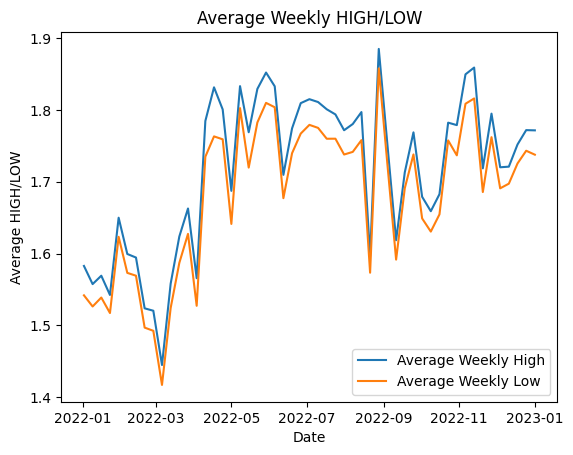

In [15]:
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'])
weekly_df = df.resample('W', on='TRADE_DATE').mean()
plt.plot(weekly_df['HIGH'], label='Average Weekly High')
plt.plot(weekly_df['LOW'], label='Average Weekly Low')
plt.xlabel('Date')
plt.ylabel('Average HIGH/LOW')
plt.title('Average Weekly HIGH/LOW')
plt.legend()
plt.show()

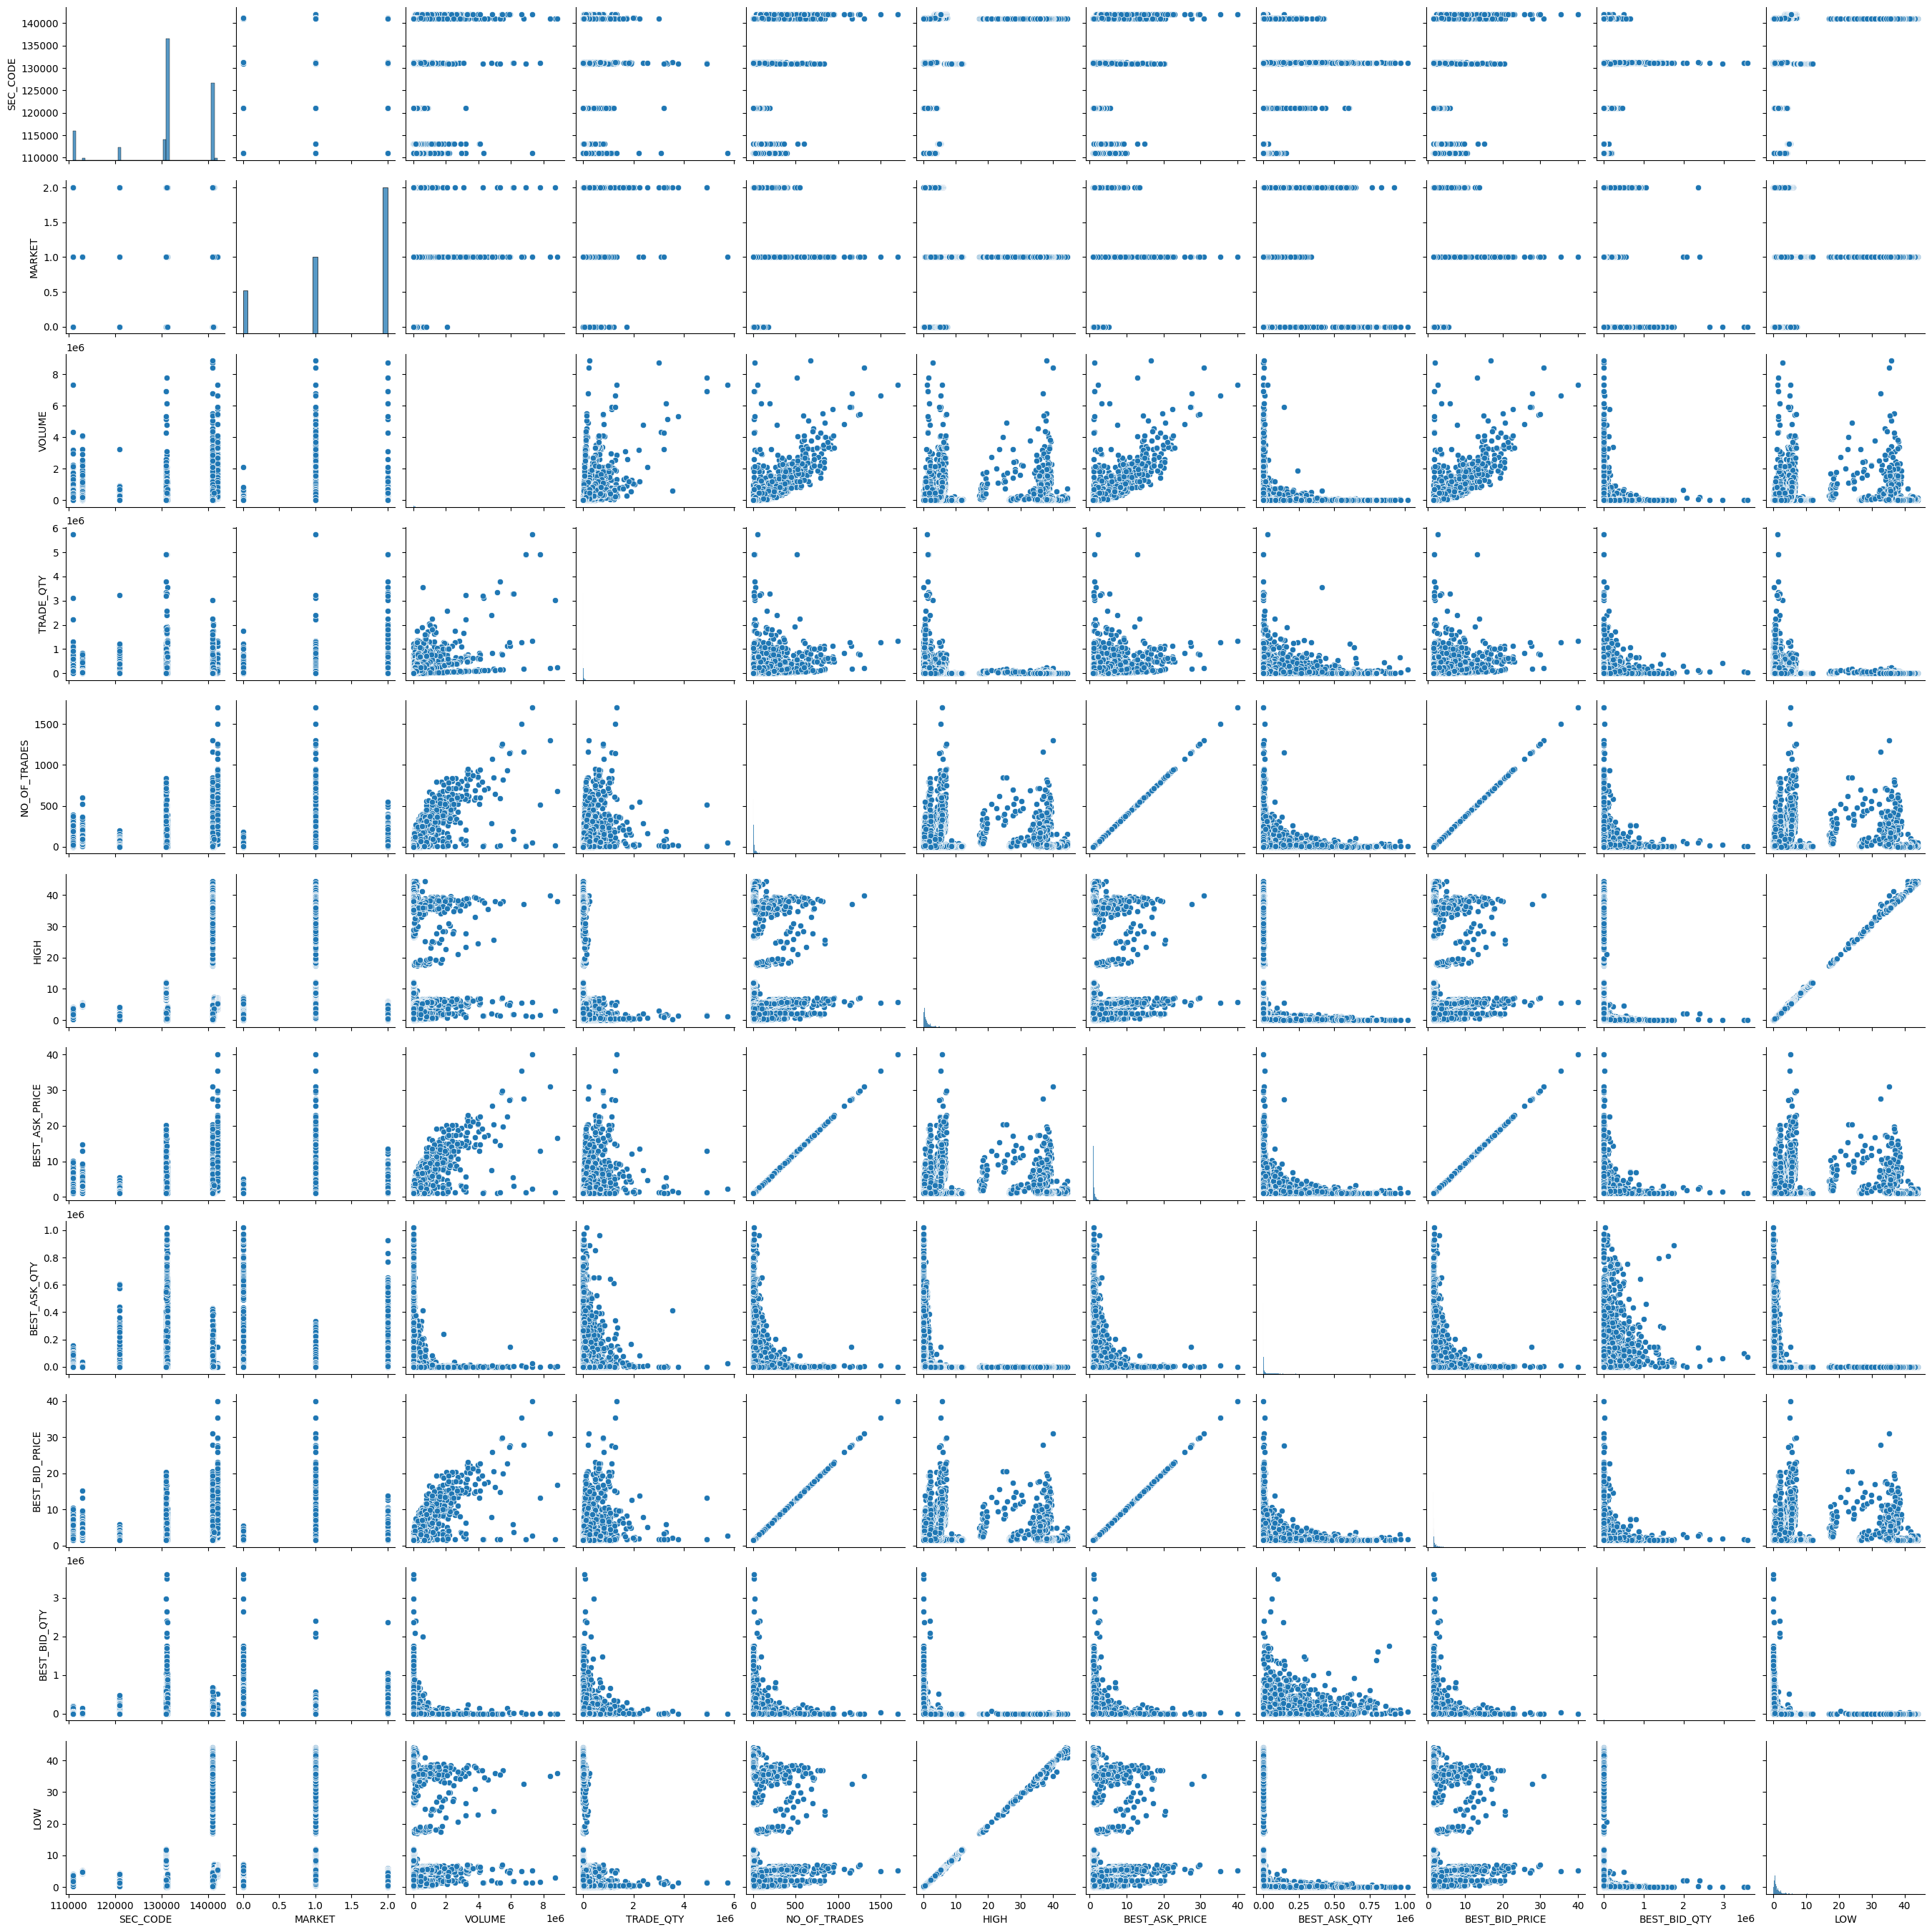

In [16]:
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 48.4% of the points cannot be plac

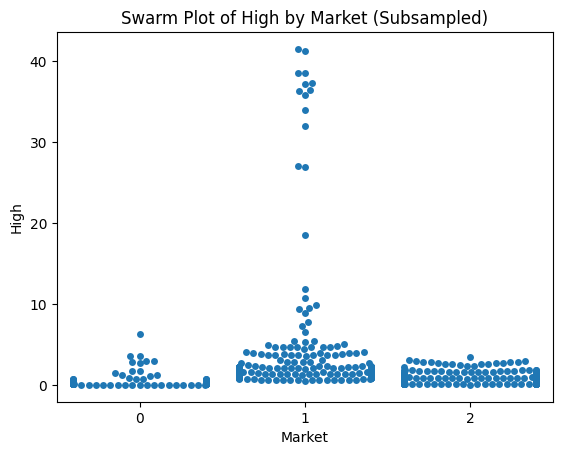

In [17]:
num_points = 800
subsampled_df = df.sample(n=num_points)
sns.swarmplot(x=subsampled_df['MARKET'], y=subsampled_df['HIGH'])
plt.xlabel('Market')
plt.ylabel('High')
plt.title('Swarm Plot of High by Market (Subsampled)')
plt.show()

In [18]:
market_0 = df[df['MARKET'] == 0]
market_1 = df[df['MARKET'] == 1]
market_2 = df[df['MARKET'] == 2]

print("MARKET 0:")
print("Min Low:", market_0['LOW'].min())
print("Max Low:", market_0['LOW'].max())
print("Min High:", market_0['HIGH'].min())
print("Max High:", market_0['HIGH'].max())
print()

print("MARKET 1:")
print("Min Low:", market_1['LOW'].min())
print("Max Low:", market_1['LOW'].max())
print("Min High:", market_1['HIGH'].min())
print("Max High:", market_1['HIGH'].max())
print()

print("MARKET 2:")
print("Min Low:", market_2['LOW'].min())
print("Max Low:", market_2['LOW'].max())
print("Min High:", market_2['HIGH'].min())
print("Max High:", market_2['HIGH'].max())

MARKET 0:
Min Low: 0.01
Max Low: 7.2
Min High: 0.02
Max High: 7.39

MARKET 1:
Min Low: 0.44
Max Low: 44.04
Min High: 0.44
Max High: 44.5

MARKET 2:
Min Low: 0.02
Max Low: 5.95
Min High: 0.03
Max High: 5.99


<ipython-input-19-c555e47ab43e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


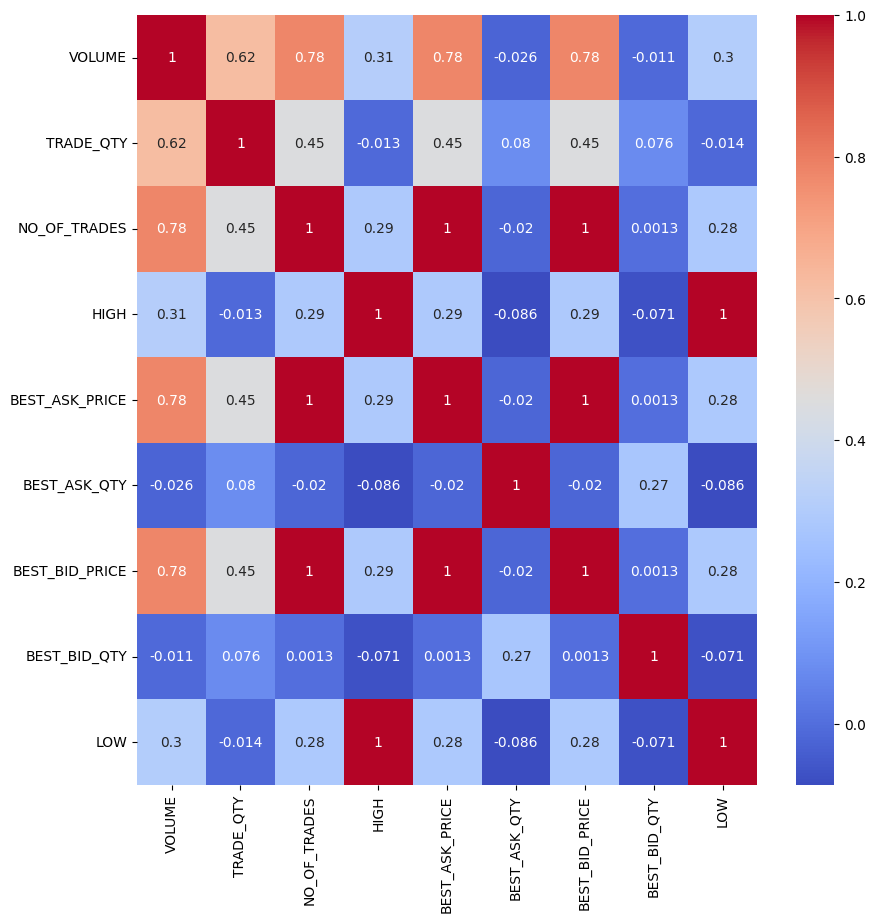

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

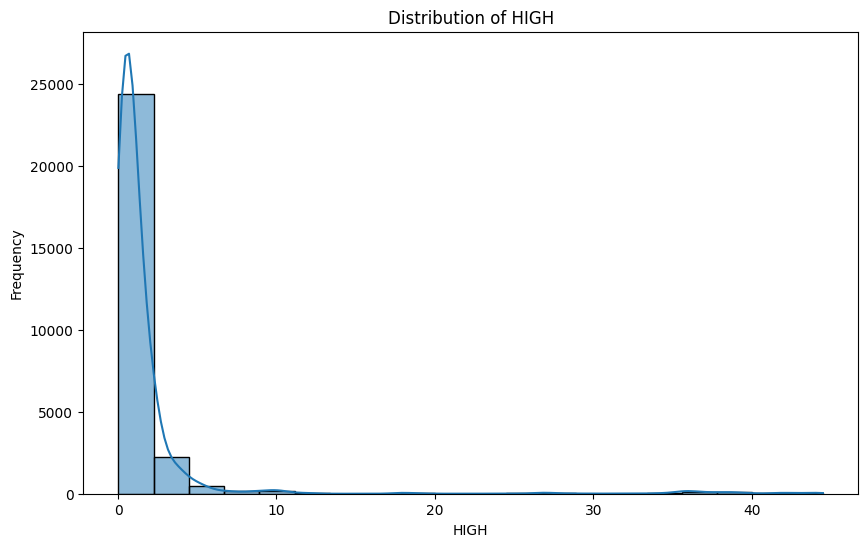

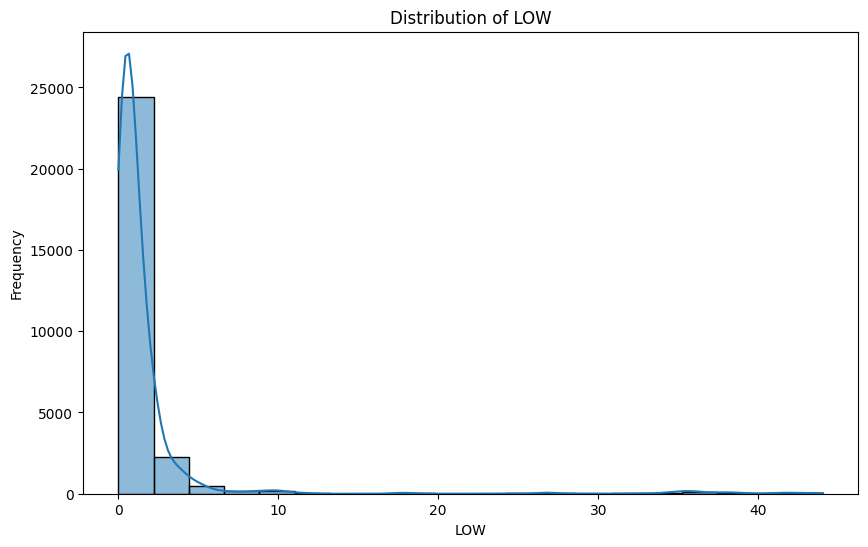

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['HIGH'], bins=20, kde=True)
plt.xlabel('HIGH')
plt.ylabel('Frequency')
plt.title('Distribution of HIGH')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['LOW'], bins=20, kde=True)
plt.xlabel('LOW')
plt.ylabel('Frequency')
plt.title('Distribution of LOW')
plt.show()

<ipython-input-21-55a55cd59a64>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  biweekly_df = df.resample('2W', on='TRADE_DATE').mean()
<ipython-input-21-55a55cd59a64>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  company_biweekly_avg = data[data['SYMBOL1'] == company].resample('2W', on='TRADE_DATE').mean()
<ipython-input-21-55a55cd59a64>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  company_biweekly_avg = data

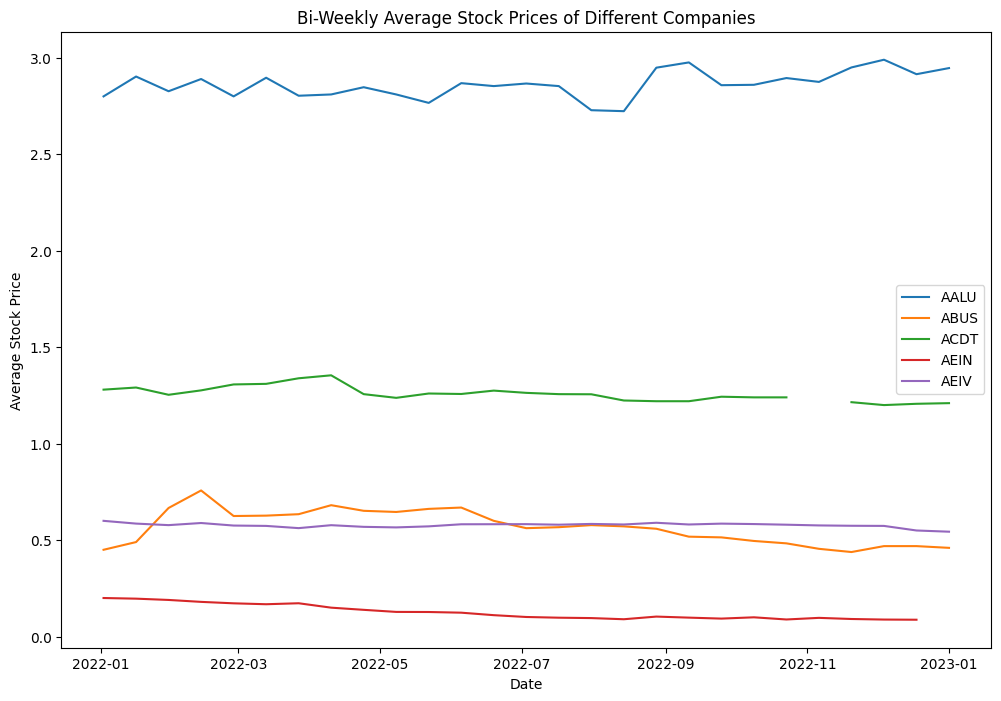

In [21]:
df['TRADE_DATE'] = pd.to_datetime(df['TRADE_DATE'])
biweekly_df = df.resample('2W', on='TRADE_DATE').mean()

companies = df['SYMBOL1'].unique()[:5]
data = df[df['SYMBOL1'].isin(companies)]

plt.figure(figsize=(12, 8))
for company in companies:
    company_biweekly_avg = data[data['SYMBOL1'] == company].resample('2W', on='TRADE_DATE').mean()
    plt.plot(company_biweekly_avg.index, company_biweekly_avg['HIGH'], label=str(company))

plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.title('Bi-Weekly Average Stock Prices of Different Companies')
plt.legend()
plt.show()

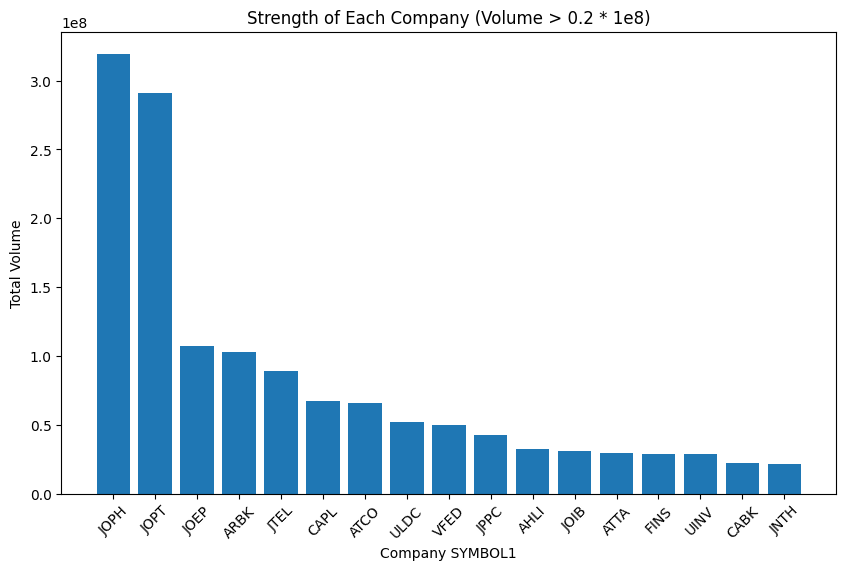

In [22]:
company_volume = df.groupby('SYMBOL1')['VOLUME'].sum()
company_volume = company_volume[company_volume > 0.2 * 1e8]
company_volume = company_volume.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(company_volume.index, company_volume.values)
plt.xlabel('Company SYMBOL1')
plt.ylabel('Total Volume')
plt.title('Strength of Each Company (Volume > 0.2 * 1e8)')
plt.xticks(rotation=45)
plt.show()

# **Data Preprocessing**

## Splitting the Dependent and Independent Features




In [23]:
X = df.drop(['HIGH', 'LOW'], axis = 1)
y_high = df['HIGH']
y_low = df['LOW']

## Dropping Redundant Features

In [24]:
X = X.drop(['BEST_ASK_PRICE', 'BEST_BID_PRICE'], axis = 1)

## Converting Catagorical Values to Numeric Values




In [25]:
X['TRADE_DATE'] = pd.to_datetime(X['TRADE_DATE']).dt.date.astype(object)
cat_columns = X.select_dtypes(['object']).columns
LE = LabelEncoder()
X[cat_columns] = X[cat_columns].apply(lambda x : LE.fit_transform(x))

## Normalizing Values

In [26]:
SS = StandardScaler()
X  = pd.DataFrame(SS.fit_transform(X), index = X.index, columns = X.columns)

# **Feature Selection**

## Select K Best

In [27]:
selector = SelectKBest(score_func = f_regression, k = 5)
selector.fit(X, y_high)
selected_features_high_skb_lr = X.columns[selector.get_support()]
selected_features_high_skb_rf = X.columns[selector.get_support()]
selected_features_high_skb_knn = X.columns[selector.get_support()]
selector.fit(X, y_low)
selected_features_low_skb_lr = X.columns[selector.get_support()]
selected_features_low_skb_rf = X.columns[selector.get_support()]
selected_features_low_skb_knn = X.columns[selector.get_support()]
print("Selected features for 'high' label:\n", selected_features_high_skb_lr)
print("\nSelected features for 'low' label:\n", selected_features_low_skb_lr)

Selected features for 'high' label:
 Index(['SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')

Selected features for 'low' label:
 Index(['SYMBOL1', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_QTY'], dtype='object')


## Sequential Feature Selection

In [28]:
from sklearn.feature_selection import SequentialFeatureSelector
model = KNeighborsRegressor(n_neighbors=5)
selector = SequentialFeatureSelector(model, n_features_to_select=4, direction='forward')
selector.fit(X, y_high)
selected_features_high_sfs_knn = X.columns[selector.get_support()]
selector.fit(X, y_low)
selected_features_low_sfs_knn = X.columns[selector.get_support()]
print("Selected features for 'HIGH' label:\n", selected_features_high_sfs_knn)
print("\nSelected features for 'LOW' label:\n", selected_features_low_sfs_knn)

Selected features for 'HIGH' label:
 Index(['SEC_CODE', 'MARKET', 'BEST_ASK_QTY', 'BEST_BID_QTY'], dtype='object')

Selected features for 'LOW' label:
 Index(['SEC_CODE', 'MARKET', 'BEST_ASK_QTY', 'BEST_BID_QTY'], dtype='object')


In [29]:
model = RandomForestRegressor(n_estimators = 5)
selector = SequentialFeatureSelector(model, n_features_to_select=4, direction='forward')
selector.fit(X, y_high)
selected_features_high_sfs_rf = X.columns[selector.get_support()]
selector.fit(X, y_low)
selected_features_low_sfs_rf = X.columns[selector.get_support()]
print("Selected features for 'HIGH' label:\n", selected_features_high_sfs_rf)
print("\nSelected features for 'LOW' label:\n", selected_features_low_sfs_rf)

Selected features for 'HIGH' label:
 Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'TRADE_QTY'], dtype='object')

Selected features for 'LOW' label:
 Index(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'TRADE_QTY'], dtype='object')


In [30]:
model = LinearRegression()
selector = SequentialFeatureSelector(model, n_features_to_select=4, direction='forward')
selector.fit(X, y_high)
selected_features_high_sfs_lr = X.columns[selector.get_support()]
selector.fit(X, y_low)
selected_features_low_sfs_lr = X.columns[selector.get_support()]
print("Selected features for 'HIGH' label:\n", selected_features_high_sfs_lr)
print("\nSelected features for 'LOW' label:\n", selected_features_low_sfs_lr)

Selected features for 'HIGH' label:
 Index(['SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')

Selected features for 'LOW' label:
 Index(['SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY'], dtype='object')


# **Predictive Analytics**

In [31]:
n_iters = 30

In [32]:
eval_high_sfs_lr = np.zeros((4, n_iters))
eval_low_sfs_lr = np.zeros((4, n_iters))
eval_high_skb_lr = np.zeros((4, n_iters))
eval_low_skb_lr = np.zeros((4, n_iters))
eval_high_wfs_lr = np.zeros((4, n_iters))
eval_low_wfs_lr = np.zeros((4, n_iters))
eval_high_sfs_rf = np.zeros((4, n_iters))
eval_low_sfs_rf = np.zeros((4, n_iters))
eval_high_skb_rf = np.zeros((4, n_iters))
eval_low_skb_rf = np.zeros((4, n_iters))
eval_high_wfs_rf = np.zeros((4, n_iters))
eval_low_wfs_rf = np.zeros((4, n_iters))
eval_high_sfs_knn = np.zeros((4, n_iters))
eval_low_sfs_knn = np.zeros((4, n_iters))
eval_high_skb_knn = np.zeros((4, n_iters))
eval_low_skb_knn = np.zeros((4, n_iters))
eval_high_wfs_knn = np.zeros((4, n_iters))
eval_low_wfs_knn = np.zeros((4, n_iters))

In [33]:
selected_features_high_wfs_lr = X.columns
selected_features_low_wfs_lr = X.columns
selected_features_high_wfs_rf = X.columns
selected_features_low_wfs_rf = X.columns
selected_features_high_wfs_knn = X.columns
selected_features_low_wfs_knn = X.columns

## Training the Models

In [34]:
models = [LinearRegression(), RandomForestRegressor(n_estimators=20), KNeighborsRegressor(n_neighbors=5)]
high_low = ['high', 'low']
model_names = ['lr', 'rf', 'knn']
feature_methods = ['sfs', 'skb', 'wfs']
for i in range(n_iters):
    X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X, y_high, test_size=0.3, random_state=i)
    X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X, y_low, test_size=0.3, random_state=i)
    
    for model, model_name in zip(models, model_names):
      for method in feature_methods:
        model.fit(X_train_high[eval('selected_features_high_' + method + '_' + model_name)], y_train_high)
        fill_list(eval('eval_high_' + method + '_' + model_name), i, y_test_high, 
                  model.predict(X_test_high[eval('selected_features_high_' + method + '_' + model_name)]))

        model.fit(X_train_low[eval('selected_features_low_' + method + '_' + model_name)], y_train_low)
        fill_list(eval('eval_low_' + method + '_' + model_name), i, y_test_low, 
                 model.predict(X_test_low[eval('selected_features_low_' + method + '_' + model_name)]))

## Evaluation of the Models

In [35]:
for i in model_names:
  for j in feature_methods:
    for k in high_low:
      print_eval(eval('eval_' + k + '_' + j + '_' + i), k, j, i)

Prediction: HIGH
Feature Selector: Sequential Feature Selection
Machine Learning Algorithm: Linear Regression
R2 Score:  0.17244779212628067
Mean Squared Error:  18.00129899889463
Root Mean Squared Error:  4.241375203563376
Mean Absolute Error:  1.5467889187860264

Prediction: LOW
Feature Selector: Sequential Feature Selection
Machine Learning Algorithm: Linear Regression
R2 Score:  0.16804565551635609
Mean Squared Error:  17.434148424125006
Root Mean Squared Error:  4.174011084909448
Mean Absolute Error:  1.5224439510760384

Prediction: HIGH
Feature Selector: Select K Best
Machine Learning Algorithm: Linear Regression
R2 Score:  0.118305514969446
Mean Squared Error:  19.180143925139387
Root Mean Squared Error:  4.378090182376455
Mean Absolute Error:  1.6007681646747354

Prediction: LOW
Feature Selector: Select K Best
Machine Learning Algorithm: Linear Regression
R2 Score:  0.11510739086802607
Mean Squared Error:  18.544551640825667
Root Mean Squared Error:  4.304925012217334
Mean Abso

## Visualization of the Results

### Putting all the Results in a DataFrame

In [36]:
eval_high = np.array([eval_high_sfs_lr,
                      eval_high_skb_lr,
                      eval_high_wfs_lr,
                      eval_high_sfs_rf,
                      eval_high_skb_rf,
                      eval_high_wfs_rf,
                      eval_high_sfs_knn,
                      eval_high_skb_knn,
                      eval_high_wfs_knn])

eval_low = np.array([eval_low_sfs_lr,
                     eval_low_skb_lr,
                     eval_low_wfs_lr,
                     eval_low_sfs_rf,
                     eval_low_skb_rf,
                     eval_low_wfs_rf,
                     eval_low_sfs_knn,
                     eval_low_skb_knn,
                     eval_low_wfs_knn])

In [37]:
data_high = {'Model': ['sfs_lr_high', 'skb_lr_high', 'wfs_lr_high',
                  'sfs_rf_high', 'skb_rf_high', 'wfs_rf_high',
                  'sfs_knn_high', 'skb_knn_high', 'wfs_knn_high'],
            'R2 Score': list(eval_high[:, 0]),
        'Mean Squared Error': list(eval_high[:, 1]),
        'Root Mean Squared Error': list(eval_high[:, 2]),
        'Mean Absolute Error': list(eval_high[:, 3])}

data_low = {'Model': ['sfs_lr_low', 'skb_lr_low', 'wfs_lr_low',
                      'sfs_rf_low', 'skb_rf_low', 'wfs_rf_low',
                      'sfs_knn_low', 'skb_knn_low', 'wfs_knn_low'],
            'R2 Score': list(eval_low[:, 0]),
            'Mean Squared Error': list(eval_low[:, 1]),
            'Root Mean Squared Error': list(eval_low[:, 2]),
            'Mean Absolute Error': list(eval_low[:, 3])}

data_high = pd.DataFrame(data_high).set_index('Model')
data_low = pd.DataFrame(data_low).set_index('Model')

In [38]:
metric_names = ['R2 Score', 'Mean Squared Error']
high_labels = [['sfs_lr_high', 'skb_lr_high', 'wfs_lr_high'],
               ['sfs_rf_high', 'skb_rf_high', 'wfs_rf_high'],
               ['sfs_knn_high', 'skb_knn_high', 'wfs_knn_high']] 
low_labels = [['sfs_lr_low', 'skb_lr_low', 'wfs_lr_low'],
               ['sfs_rf_low', 'skb_rf_low', 'wfs_rf_low'],
               ['sfs_knn_low', 'skb_knn_low', 'wfs_knn_low']] 

### Bar Plots

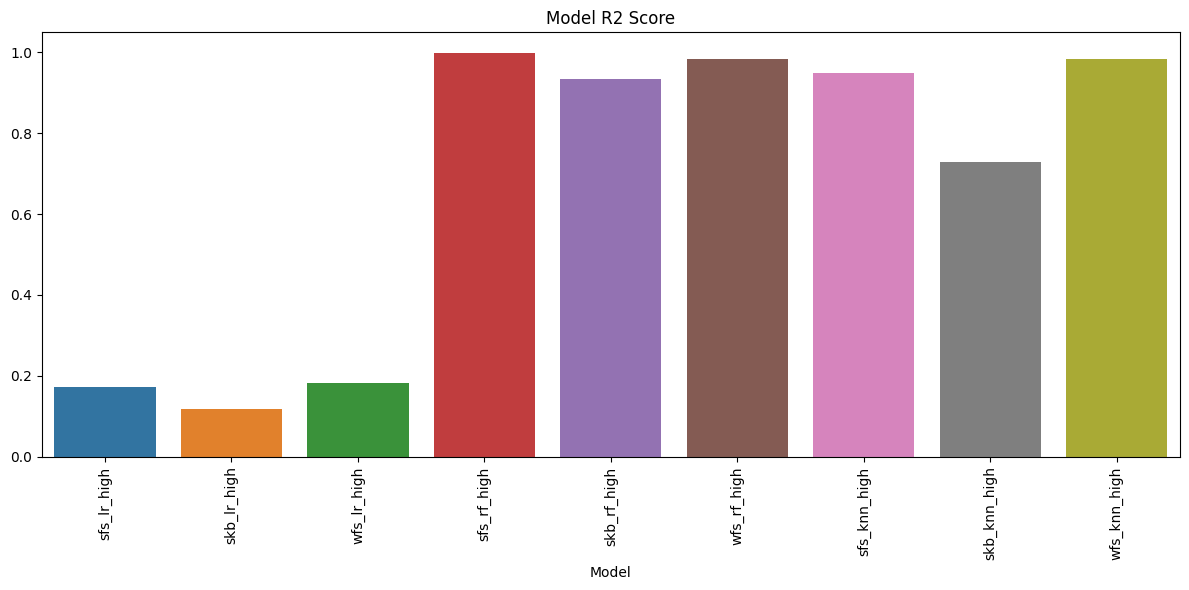

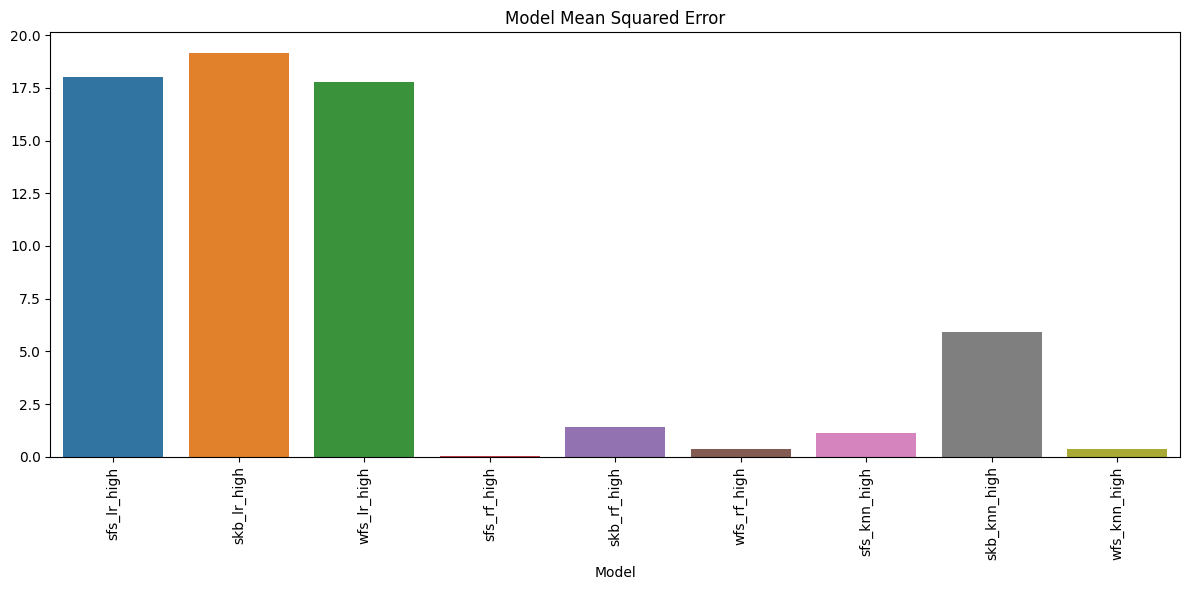

In [39]:
for i in metric_names:
  print_bar_plots(data_high, i)

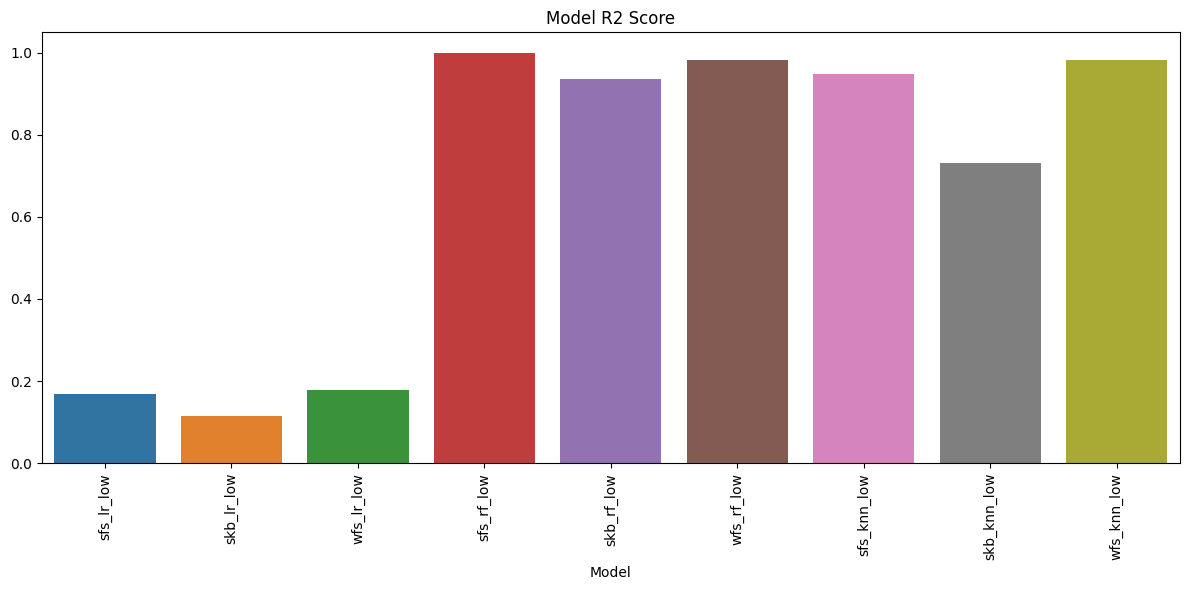

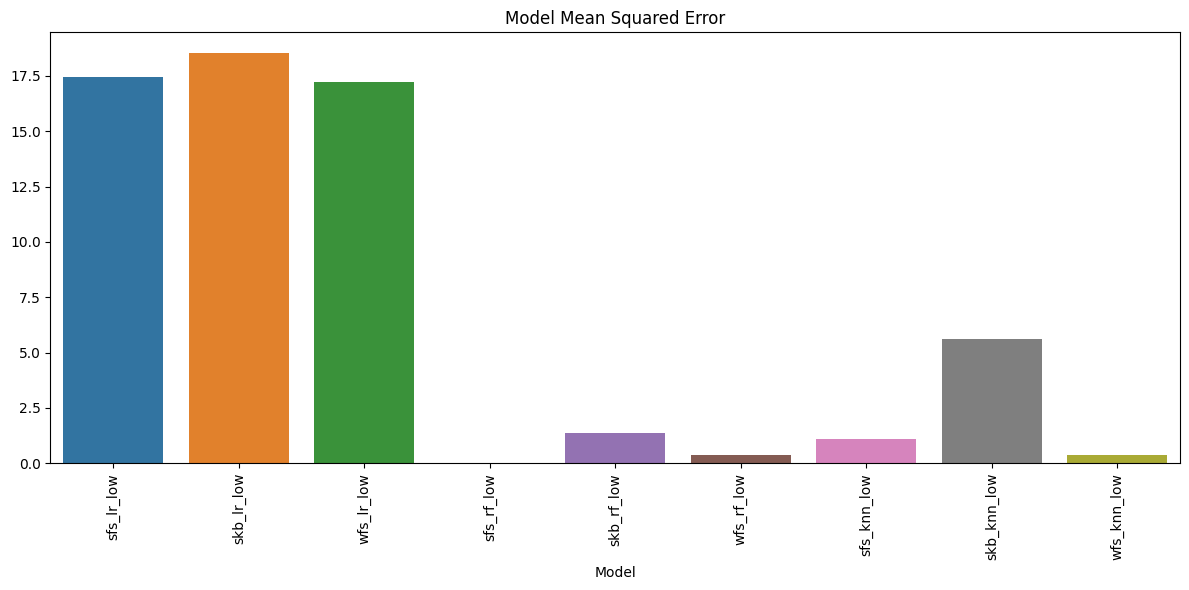

In [40]:
for i in metric_names:
  print_bar_plots(data_low, i)

### Box Plots

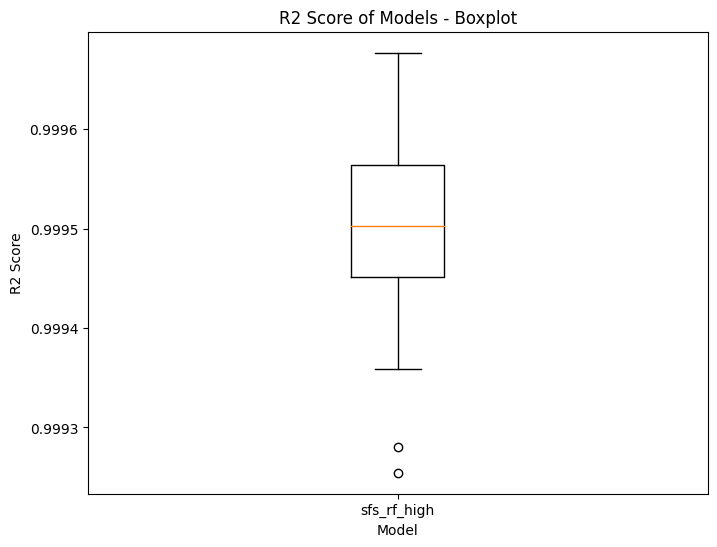

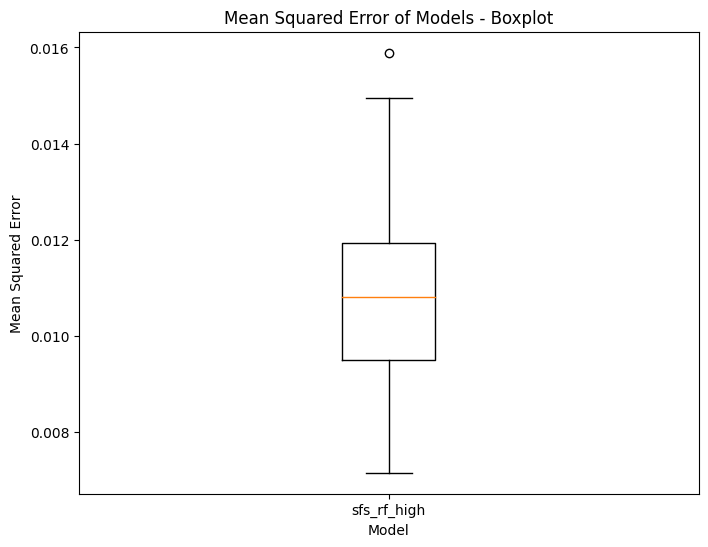

In [41]:
highest_model_high = data_high.index[np.argmax([np.mean(lst) for lst in data_high['R2 Score'].tolist()])]
for i in metric_names: 
    print_box_plot(data_high[i].loc[highest_model_high], i, highest_model_high)

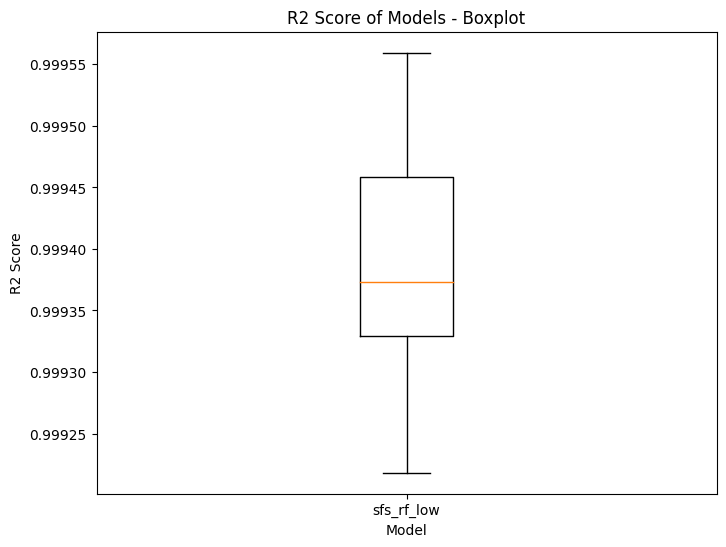

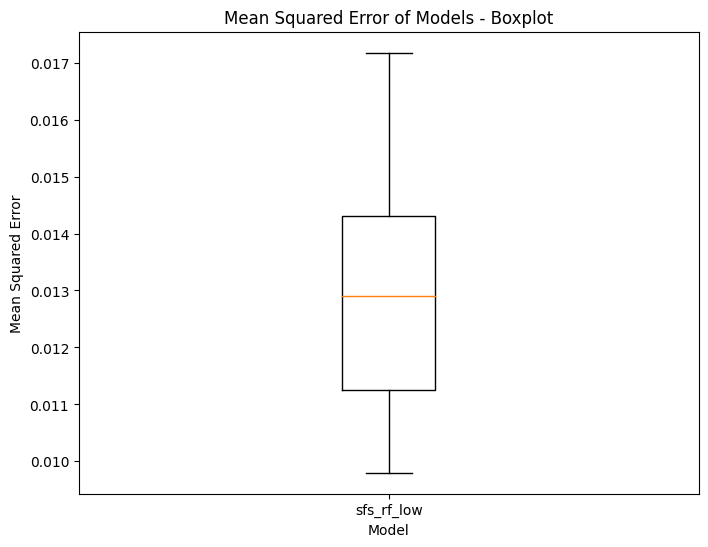

In [42]:
highest_model_low = data_low.index[np.argmax([np.mean(lst) for lst in data_low['R2 Score'].tolist()])]
for i in metric_names: 
    print_box_plot(data_low[i].loc[highest_model_low], i, highest_model_low)